1.1 NetworkX Basics

In [1]:
import networkx as nx

In [2]:
G = nx.Graph()
G = nx.DiGraph()
G = nx.MultiGraph()
G = nx.MultiDiGraph()

1.3 Graph Creation

In [3]:
G = nx.Graph()
G.add_edge(1, 2) # default edge data=1
G.add_edge(2, 3, weight=0.9) # specify edge data

In [6]:
import math
G.add_edge('y', 'x', function=math.cos)
G.add_node(math.cos) # any hashable can be a node

In [7]:
elist = [(1, 2), (2, 3), (1, 4), (4, 2)]
G.add_edges_from(elist)
elist = [('a', 'b', 5.0), ('b', 'c', 3.0), ('a', 'c', 1.0), ('c', 'd', 7.3)]
G.add_weighted_edges_from(elist)

1.5 Algorithms

In [9]:
G = nx.Graph()
e = [('a', 'b', 0.3), ('b', 'c', 0.9), ('a', 'c', 0.5), ('c', 'd', 1.2)]
G.add_weighted_edges_from(e)
print(nx.dijkstra_path(G, 'a', 'd'))

['a', 'c', 'd']


1.6 Drawing

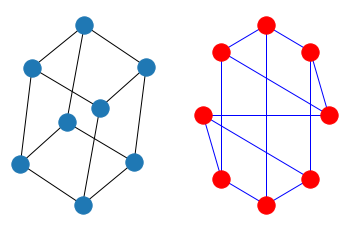

In [10]:
import matplotlib.pyplot as plt
G = nx.cubical_graph()
subax1 = plt.subplot(121)
nx.draw(G) # default spring_layout
subax2 = plt.subplot(122)
nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b')

1.7 Data Structure

In [11]:
G = nx.Graph()
G.add_edge('A', 'B')
G.add_edge('B', 'C')
print(G.adj)

{'A': {'B': {}}, 'B': {'A': {}, 'C': {}}, 'C': {'B': {}}}


In [13]:
G = nx.Graph()
G.add_edge(1, 2, color='red', weight=0.84, size=300)
print(G[1][2]['size'])
print(G.edges[1, 2]['color'])

300
red


2.2 Basic graph types  
2.2.1 Graph—Undirected graphs with self loops

In [14]:
G = nx.Graph()
G.add_node(1)

In [15]:
G.add_nodes_from([2, 3])
G.add_nodes_from(range(100, 110))
H = nx.path_graph(10)
G.add_nodes_from(H)

In [16]:
G.add_node(H)
G.add_edge(1, 2)
G.add_edges_from([(1, 2), (1, 3)])
G.add_edges_from(H.edges)

In [17]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

In [19]:
G.add_node(1, time="5pm")
G.add_nodes_from([3], time="2pm")
G.nodes[1]

{'time': '5pm'}

In [20]:
G.nodes[1]["room"] = 714 # node must exist already to use G.nodes
del G.nodes[1]["room"] # remove attribute
list(G.nodes(data=True))

[(1, {'time': '5pm'}), (3, {'time': '2pm'})]

In [21]:
G.add_edge(1, 2, weight=4.7)
G.add_edges_from([(3, 4), (4, 5)], color="red")
G.add_edges_from([(1, 2, {"color": "blue"}), (2, 3, {"weight": 8})])
G[1][2]["weight"] = 4.7
G.edges[1, 2]["weight"] = 4

In [26]:
1 in G # check if node in graph

True

In [27]:
[n for n in G if n < 3] # iterate through nodes

[1, 2]

In [28]:
len(G)

5

In [29]:
for n, nbrsdict in G.adjacency():
    for nbr, eattr in nbrsdict.items():
        if "weight" in eattr:
            # Do something useful with the edges
            pass


In [30]:
for u, v, weight in G.edges.data("weight"):
    if weight is not None:
        # Do something useful with the edges
        pass

In [33]:
class ThinGraph(nx.Graph):
    all_edge_dict = {"weight": 1}
    def single_edge_dict(self):
        return self.all_edge_dict
    edge_attr_dict_factory = single_edge_dict
G = ThinGraph()
G.add_edge(2, 1)
G[2][1]

{'weight': 1}

In [34]:
G.add_edge(2, 2)
G[2][1] is G[2][2]

True

Methods  
Adding and removing nodes and edges

In [35]:
G = nx.Graph() # or DiGraph, MultiGraph, MultiDiGraph, etc
G = nx.Graph(name="my graph")
e = [(1, 2), (2, 3), (3, 4)] # list of edges
G = nx.Graph(e)

In [36]:
G = nx.Graph(e, day="Friday")
G.graph

{'day': 'Friday'}

In [37]:
G = nx.Graph() # or DiGraph, MultiGraph, MultiDiGraph, etc
G.add_node(1)
G.add_node("Hello")
K3 = nx.Graph([(0, 1), (1, 2), (2, 0)])
G.add_node(K3)
G.number_of_nodes()

3

In [38]:
G.add_node(1, size=10)
G.add_node(3, weight=0.4, UTM=("13S", 382871, 3972649))

In [39]:
G = nx.Graph() # or DiGraph, MultiGraph, MultiDiGraph, etc
G.add_nodes_from("Hello")
K3 = nx.Graph([(0, 1), (1, 2), (2, 0)])
G.add_nodes_from(K3)
sorted(G.nodes(), key=str)

[0, 1, 2, 'H', 'e', 'l', 'o']

In [40]:
G.add_nodes_from([1, 2], size=10)
G.add_nodes_from([3, 4], weight=0.4)

In [41]:
G.add_nodes_from([(1, dict(size=11)), (2, {"color": "blue"})])
G.nodes[1]["size"]

11

In [42]:
H = nx.Graph()
H.add_nodes_from(G.nodes(data=True))
H.nodes[1]["size"]

11

In [43]:
G = nx.path_graph(3) # or DiGraph, MultiGraph, MultiDiGraph, etc
list(G.edges)

[(0, 1), (1, 2)]

In [44]:
G.remove_node(1)
list(G.edges)

[]

In [45]:
G = nx.path_graph(3) # or DiGraph, MultiGraph, MultiDiGraph, etc
e = list(G.nodes)
e

[0, 1, 2]

In [46]:
G.remove_nodes_from(e)
list(G.nodes)

[]

In [48]:
G = nx.Graph() # or DiGraph, MultiGraph, MultiDiGraph, etc
e = (1, 2)
G.add_edge(1, 2) # explicit two-node form
G.add_edge(*e) # single edge as tuple of two nodes
G.add_edges_from([(1, 2)]) # add edges from iterable container

In [49]:
G.add_edge(1, 2, weight=3)
G.add_edge(1, 3, weight=7, capacity=15, length=342.7)

In [50]:
G.add_edge(1, 2)
G[1][2].update({0: 5})
G.edges[1, 2].update({0: 5})

pg 16